<a href="https://colab.research.google.com/github/mrSnow95/Python/blob/master/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from collections import defaultdict 


In [67]:
%pip install handcalcs
import handcalcs.render



# **Throwing 2 dices**

In [4]:
d = { (i,j): i+j for i in range(1,7) for j in range(1,7)}
d.items()

dict_items([((1, 1), 2), ((1, 2), 3), ((1, 3), 4), ((1, 4), 5), ((1, 5), 6), ((1, 6), 7), ((2, 1), 3), ((2, 2), 4), ((2, 3), 5), ((2, 4), 6), ((2, 5), 7), ((2, 6), 8), ((3, 1), 4), ((3, 2), 5), ((3, 3), 6), ((3, 4), 7), ((3, 5), 8), ((3, 6), 9), ((4, 1), 5), ((4, 2), 6), ((4, 3), 7), ((4, 4), 8), ((4, 5), 9), ((4, 6), 10), ((5, 1), 6), ((5, 2), 7), ((5, 3), 8), ((5, 4), 9), ((5, 5), 10), ((5, 6), 11), ((6, 1), 7), ((6, 2), 8), ((6, 3), 9), ((6, 4), 10), ((6, 5), 11), ((6, 6), 12)])

In [6]:
dinv = defaultdict(list)
for i,j in d.items():
  dinv[j].append(i)
dinv



defaultdict(list,
            {2: [(1, 1)],
             3: [(1, 2), (2, 1)],
             4: [(1, 3), (2, 2), (3, 1)],
             5: [(1, 4), (2, 3), (3, 2), (4, 1)],
             6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
             7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)],
             8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)],
             9: [(3, 6), (4, 5), (5, 4), (6, 3)],
             10: [(4, 6), (5, 5), (6, 4)],
             11: [(5, 6), (6, 5)],
             12: [(6, 6)]})

In [9]:
X = {i:len(j)/36. for i,j in dinv.items()}
Xg

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

With this framework, we can ask other questions like what is the probability that half the product of three dice will exceed the their sum? 

In [12]:
d = { (i,j,k): ( (i*j*k)/2 > (i+j+k) ) for i in range(1,7)
                                          for j in range(1,7)
                                              for k in range(1,7) }

dinv = defaultdict(list)
for i,j in d.items():
  dinv[j].append(i)

X = {i:len(j)/6.0**3 for i,j in dinv.items()}
print(X)

{False: 0.37037037037037035, True: 0.6296296296296297}


This time one of the dice is no longer fair. The distribution for the unfair die is the following:

P[1] = P[2] = P[3] = 1/9

P[4] = P[5] = P[6] = 2/9

In [39]:
from pandas import DataFrame

d = DataFrame(index = [ (i,j) for i in range(1,7) for j in range(1,7)],columns = ['sm','d1','d2','pd1','pd2','p'] )

d.d1,d.d2 = [i[0] for i in d.index],[i[1] for i in d.index]
d.sm = list(map(lambda x: x[0] + x[1],d.index))
d.loc[d.d1 <= 3,'pd1'] = 1/9.0
d.loc[d.d1 > 3,'pd1'] = 2/9.0
d.loc[:,'pd2'] = 1/6.0

d.p = d.pd1*d.pd2


In [29]:

#select sm,sum(p) from df group by sum(p) order by 1 asc

d.groupby('sm')['p'].sum()

sm
2     0.018519
3     0.037037
4     0.055556
5     0.092593
6     0.129630
7     0.166667
8     0.148148
9     0.129630
10    0.111111
11    0.074074
12    0.037037
Name: p, dtype: float64

**Classic Broken Rod Example**

given a rod of unit-length, broken independently and randomly at two places, what is the probability that you can assemble the three remaining pieces into a triangle? 




A + B + C = 1

A = X
B = Y - X
C = 1 - Y

In [38]:
import math

x,y = np.random.rand(2,1000)
a,b,c = x,y-x,1-y
s = (a+b+c)/2
probs = np.mean( (s>a) & (s>b) & (s>c) & (y>x) )
print(probs)


0.115


Find a point along a blue line that its closest to the square

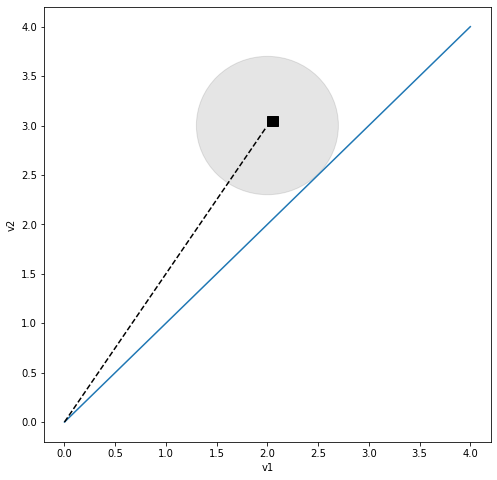

In [65]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle,Rectangle

x = np.linspace(0,4,100)
y = np.linspace(0,4,100)

fig, ax = plt.subplots(figsize =(8, 8)) 

circle = Circle((2,3),0.7,alpha = 0.1,color = 'black')
square = Rectangle((2,3),0.1,0.1,color = 'black')
ax.add_patch(circle)
ax.add_patch(square)
x2 = x[x<2]
plt.xlabel('v1')
plt.ylabel('v2')
plt.plot(x,y,x2,3/2*x2,'k--',)



$$ x = \alpha v $$
$$ v = [1,1]^t $$
$$ (y-\alpha v)^t v = 0 $$

# **CONDITIONAL EXPECTATION AS PROJECTION**

Important concept: The inner product between two random variables is ther expected join value


$$ <X,Y> = \mathbf{E}(XY)$$

So a lot of optimization problems involving random variables boils down to:

$$ <X - h_{opt}(Y),Y> = 0 $$

The conditional expectation is the minimum mean squared error (MMSE) solution to the following problem:

$$min\int_{\mathbb{R}} (x-h(y))^2 f_{xy}(x,y) dx$$

Ou seje, among all possibles h(y), find the one that minimizes the above expression, which is :

$$h_{opt}(Y) = \mathbf{E}(X|Y) $$

A simple case: Whats the minimum c such that 

$$(X-c)^2 $$

is minimum ? 

$$ E(X-c)^2 = E(X^2 - 2Xc + c^2) = c^2 - 2cE(X) + E(X^2) $$
$$ \frac{d}{dc} (c^2 - 2cE(X) + E(X^2)) = 0    $$
$$ c = E(X) $$

or , using dot product :

$$ <X - c_{opt},1> = 0 $$
$$ <X,1> - <c_{opt},1> = 0 =>  c = E(X)$$


Seja um vetor v pertencente a um espaço vetorial V , e u pertencente a um subespaço de V. De todos os elementos de U , aquele que minima : 
$$||v-u||^2$$

é a projeção de v em u.

$$ v = v_{u} + w , v_{u} \in U , w \in U^{\perp} $$
$$||v-u||^2 = <v-u,v-u> = <v_{u} - u + w, v_{u} - u + w>$$
$$ <v_{u}-u,v_{u}-u> +2<v_{u}-u,w> +  <w,w> = ||v_{u} - u||^2 + ||w||^2 $$

O minimo ocorre para :
$$ u = v_{u} $$

**Example**


Seja :

$$ f_{xy} = x + y  , (x,y) \in [0,1)^2$$
$$ E(X|Y) = \int_{0}^1 x \frac{f_{xy}(x,y)}{f_{y}(y)} = \int_{0}^1 x \frac{x+y}{y+\frac{1}{2}}  = \frac{3y+2}{6y+3}$$

The same could be found doing:

$$ E((X-h(Y))Y) = 0 = \int_{0}^1\int_{0}^1(x-h(y))y(x+y)(x+y)dxdy = 0 $$

The optimal h(Y) is:

$$2y + 3y^2 - 3yh(y) - 6y^2h(y) = 0 $$
$$ h_{opt} = \frac{3y+2}{6y+3} $$

Lets find the length of the error function we found earlier for this example:

$$ \mathbf{E}(X - \mathbf{E}(X|Y))^2 + \mathbf{E}(\mathbf{E}(X|Y))^2 = \mathbf{E}(X)^2$$ 

In [5]:
from sympy.abc import y,x
from sympy import integrate , simplify

fxy = x+y
fy = integrate(fxy,(x,0,1))
fx = integrate(fxy,(y,0,1))

EXY = (3*y+2)/(6*y+3)
LHS = integrate((x-EXY)**2*fxy,(x,0,1),(y,0,1)) + integrate(EXY**2*fy,(y,0,1))
RHS = integrate(x**2*fx,(x,0,1))


In [6]:
LHS

5/12

In [7]:
RHS

5/12

# **Conditional Expectation and Mean Squared Error**


Suppose we have two fair six sided dice (X and Y) and we want to measure the sum of the two variables as Z = X + Y. Further, let’s suppose that given Z, we want the best estimate of X in the mean squared-sense. Thus, we want to minimize the following:


$$ J(\alpha) = \sum (x-\alpha z)^2 P(x,z) $$
$$ J(\alpha) = \sum (x-\alpha (x+y))^2 P(x,z) $$

In [16]:
import sympy as S
from sympy.stats import density, E, Die

x = Die('D1',6)
y = Die('D2',6)
a = S.symbols('a')
z = x+y
J = E((x-a*(x+y))**2)
print(S.simplify(J))

329*a**2/6 - 329*a/6 + 91/6


In [17]:
sol = S.solve(S.diff(J,a),a) 
# using calculus to minimize
print(sol)  # 1/2 , that is ,z/2 is as close to x as we are going to get for a given z.

[1/2]


In [18]:
import numpy as np
from sympy import stats
# Eq constrains Z
samples_z7 = lambda : stats.sample(x, S.Eq(z,7))
#using 6 as an estimate
mn= np.mean([(6-samples_z7())**2 for i in range(100)])
#7/2 is the MSE estimate
mn0= np.mean([(7/2.-samples_z7())**2 for i in range(100)])
print('MSE=%3.2f using 6 vs MSE=%3.2f using 7/2 ' % (mn,mn0))


MSE=9.04 using 6 vs MSE=3.17 using 7/2 


Three coins, 10, 20 and 50p are tossed. The values of the coins that land heads up are totaled. What is the expected total given that two coins have landed heads up? In this case we have we want to compute E(ξ|η) where:


$$\epsilon = 10X_{10} + 20X_{20}+50X_{50} , X_{i} \in (0,1)$$

if only two heads up, then:

$$\eta = X_{10}X_{20}(1-X_{50}) + X_{10}X_{50}(1-X_{20}) + X_{20}X_{50}(1-X_{10})$$

So we want:

$$ MSE = \sum_{X \in (0,1)^3}(\epsilon - h(\eta))^2$$

writing

$$ h(\eta) = \alpha \eta $$
We already know that $\eta_{opt}$ is the projection of $\epsilon$ in $\eta$

$$ \alpha = \frac{<\eta,\epsilon>}{<\eta,\eta>} $$

In [20]:
import sympy as S
X10,X20,X50 = S.symbols('X10,X20,X50',real=True)
xi = 10*X10+20*X20+50*X50
eta = X10*X20*(1-X50)+X10*(1-X20)*(X50)+(1-X10)*X20*(X50)
num=S.summation(xi*eta,(X10,0,1),(X20,0,1),(X50,0,1))
den=S.summation(eta*eta,(X10,0,1),(X20,0,1),(X50,0,1))
alpha=num/den

print(alpha)  

160/3


 $$\mathbf{E}(\epsilon|\eta) = \frac{160}{3}\eta = 53.33\eta$$

Doing a little motherfucker simulation using pandas :

In [26]:
import pandas as pd
d = pd.DataFrame(columns = ['X10','X20','X50'])
d.X10 = np.random.randint(0,2,1000)
d.X20 = np.random.randint(0,2,1000)
d.X50 = np.random.randint(0,2,1000)
grp = d.groupby(d.eval('X10+X20+X50'))
grp.get_group(2).eval('10*X10 + 20*X20 + 50*X50').mean()

54.45333333333333

Or using pure numpy

In [8]:
import numpy as np
from numpy import array
x = np.random.randint(0,2,(3,1000))
mu = np.dot(x[:,x.sum(axis=0)==2].T,array([10,20,50])).mean()
mu

53.70473537604457